In [56]:
import pandas as pd

reviews = pd.read_csv("yelp_singapore_restaurants_reviews.csv", encoding = "ISO-8859-1")
reviews.head()

,restaurant,content,stars,date
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00


In [57]:
reviews.tail()

,restaurant,content,stars,date
10121,Ocean Curry Fish Head,I'm surprised at how good the fish head curry ...,5,2016-01-31T00:00:00
10122,Ocean Curry Fish Head,Absolutely yummy goodness. ýýýýThe restaurant ...,4,2018-07-01T00:00:00
10123,Ocean Curry Fish Head,$45 for 2... curry fishhead plus 3 side dishes...,4,2014-12-31T00:00:00
10124,Ocean Curry Fish Head,I'll be frank to say that the food is not chea...,4,2014-12-31T00:00:00
10125,Shan E Punjab,This is hawker stall food at its finest. We ha...,5,2018-07-23T00:00:00


In [53]:
reviews.shape

(10126, 4)

In [59]:
restaurant_names = []

for i in reviews['restaurant']:
    if not i in restaurant_names:
        restaurant_names.append(i)
        
len(restaurant_names)

770

In [70]:
restaurant_dict = dict()

for index, i in enumerate(restaurant_names):
    restaurant_dict[i] = index
    
restaurant_dict

{'Sungei Road Laksa': 0,
 'Holycrab': 1,
 'Tian Tian Hainanese Chicken Rice': 2,
 'Song Fa Bak Kut Teh': 3,
 'Jumbo Seafood': 4,
 'National Kitchen By Violet Oon': 5,
 'Liao Fan Hawker Chan': 6,
 'Din Tai Fung': 7,
 'Khansama Tandoori': 8,
 'Tim Ho Wan': 9,
 'Corner House': 10,
 'Coriander Leaf': 11,
 'Vatos Urban Tacos': 12,
 'Hong Kong Style Chee Cheong Fun': 13,
 'Burnt Ends': 14,
 'The Coconut Club': 15,
 'Zhong Guo La Mian Xiao Long Bao': 16,
 '328 Katong Laksa': 17,
 'Hokkaido Ramen Santouka': 18,
 'Wee Nam Kee Chicken Rice': 19,
 'JustIN Flavours of Asia': 20,
 'Komala Vilas Restaurant': 21,
 'edge': 22,
 'Old Airport Road Food Centre': 23,
 'Spago By Wolfgang Puck': 24,
 'Usman Restaurant': 25,
 'Sawadee Thai Cuisine': 26,
 'Blanco Court Prawn Mee': 27,
 'Tai Hwa Pork Noodle': 28,
 'Zam Zam Restaurant': 29,
 'A Noodle Story': 30,
 'Outram Park Fried Kway Teow Mee': 31,
 'Tanglin Food Hall': 32,
 'MTR 1924': 33,
 'The Naked Finn': 34,
 'Hainanese Delicacy Chicken Rice': 35,
 'Ho

In [76]:
reviews['enum_restaurant'] = reviews['restaurant'].apply(lambda x : restaurant_dict[x])

Text(0,0.5,'Frequency of Reviews')

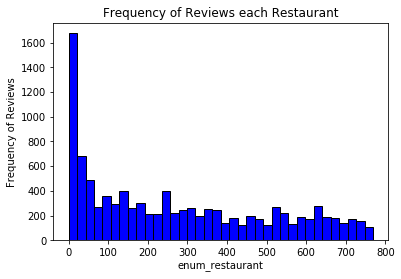

In [86]:
plt.hist(reviews['enum_restaurant'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title("Frequency of Reviews each Restaurant")
plt.xlabel("enum_restaurant")
plt.ylabel("Frequency of Reviews")

Text(0,0.5,'Frequency of Restaurants')

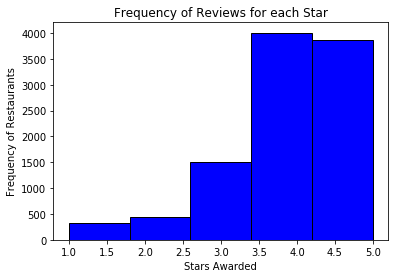

In [127]:
plt.hist(reviews['stars'], color = 'blue', edgecolor = 'black', bins = int(180/36))
plt.title("Frequency of Reviews for each Star")
plt.xlabel("Stars Awarded")
plt.ylabel("Frequency of Restaurants")